In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno
import sweetviz
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns',None)

In [79]:
train_df  = pd.read_csv('train.csv')

In [80]:
test_df = pd.read_csv('test.csv')

In [81]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [82]:
train_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [83]:
train_df['CoapplicantIncome'] = train_df['CoapplicantIncome'].astype(float)
test_df['CoapplicantIncome'] = test_df['CoapplicantIncome'].astype(float)

In [84]:
train_df.drop('Loan_ID',axis=1,inplace = True)
test_df.drop('Loan_ID',axis=1,inplace = True)

In [85]:
train_df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [87]:
train_df['Gender'].fillna('Male',inplace=True)
test_df['Gender'].fillna('Male',inplace=True)

train_df['Married'].fillna('Yes',inplace=True)

train_df['Dependents'].fillna(0,inplace=True)
test_df['Dependents'].fillna(0,inplace=True)

train_df['Self_Employed'].fillna('No',inplace=True)
test_df['Self_Employed'].fillna('No',inplace=True)

train_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
train_df['LoanAmount'] = train_df['LoanAmount'] * 1000 
test_df['LoanAmount'].fillna(train_df['LoanAmount'].median(),inplace=True)
test_df['LoanAmount'] = test_df['LoanAmount'] * 1000

train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(),inplace=True)
test_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].median(),inplace=True)

train_df['Monthly_pay'] = train_df['LoanAmount'] // train_df['Loan_Amount_Term'] 
test_df['Monthly_pay'] = test_df['LoanAmount'] // test_df['Loan_Amount_Term']

train_df['diff'] = train_df['ApplicantIncome']   - train_df['Monthly_pay']
train_df['imp'] = np.where(train_df['diff']<0,0,1)
train_df['diff'] = np.where(train_df['diff']<0,0,train_df['diff'])
test_df['diff'] = test_df['ApplicantIncome']  - test_df['Monthly_pay']
test_df['imp'] = np.where(test_df['diff']<0,0,1)
test_df['diff'] = np.where(test_df['diff']<0,0,test_df['diff'])


train_df['CoapplicantIncome_nan'] = np.where(train_df['CoapplicantIncome']==0.0,1,0)
#train_df['CoapplicantIncome'] = np.where(train_df['CoapplicantIncome']==0.0,train_df['CoapplicantIncome'].median(),train_df['CoapplicantIncome'])
test_df['CoapplicantIncome_nan'] = np.where(test_df['CoapplicantIncome']==0.0,1,0)
#test_df['CoapplicantIncome'] = np.where(test_df['CoapplicantIncome']==0.0,train_df['CoapplicantIncome'].median(),test_df['CoapplicantIncome'])



train_df['Credit_History_nan'] = np.where(train_df['Credit_History'].isnull(),1.0,0.0)
test_df['Credit_History_nan'] = np.where(test_df['Credit_History'].isnull(),1.0,0.0)
train_df['Credit_History'].fillna(1.0,inplace=True)
test_df['Credit_History'].fillna(1.0,inplace=True)


train_df['Dependents'] = np.where(train_df['Dependents']== '3+',3,train_df['Dependents']) 
test_df['Dependents'] = np.where(test_df['Dependents']== '3+',3,test_df['Dependents'])
train_df['Dependents'] = train_df['Dependents'].astype(int)
test_df['Dependents'] = test_df['Dependents'].astype(int)



train_df['diff1'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome'] - train_df['Monthly_pay']
train_df['imp1'] = np.where(train_df['diff1']<0,0,1)
train_df['diff1'] = np.where(train_df['diff1']<0,0,train_df['diff1'])

test_df['diff1'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome'] - test_df['Monthly_pay']
test_df['imp1'] = np.where(test_df['diff1']<0,0,1)
test_df['diff1'] = np.where(test_df['diff1']<0,0,test_df['diff1'])


train_df['Loan_Status'] = np.where(train_df['Loan_Status']=='Y',1,0)

In [88]:
Gender_Married = []
for i in zip(train_df['Gender'],train_df['Married']):
    Gender_Married.append(i)
Gender_Married = pd.Series(Gender_Married,name='Gender_Married')
train_df = pd.concat([train_df,Gender_Married],axis=1)

Gender_Married = []
for i in zip(test_df['Gender'],test_df['Married']):
    Gender_Married.append(i)
Gender_Married = pd.Series(Gender_Married,name='Gender_Married')
test_df = pd.concat([test_df,Gender_Married],axis=1)

Self_employed_Property_area = []
for i in zip(train_df['Self_Employed'],train_df['Property_Area']):
    Self_employed_Property_area.append(i)
Self_employed_Property_area = pd.Series(Self_employed_Property_area,name='Self_employed_Property_area')
train_df = pd.concat([train_df,Self_employed_Property_area],axis=1)

Self_employed_Property_area = []
for i in zip(test_df['Self_Employed'],test_df['Property_Area']):
    Self_employed_Property_area.append(i)
Self_employed_Property_area = pd.Series(Self_employed_Property_area,name='Self_employed_Property_area')
test_df = pd.concat([test_df,Self_employed_Property_area],axis=1)

In [89]:
num_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O' and feature != 'Loan_Status' ] 

In [90]:
num_features

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Monthly_pay',
 'diff',
 'imp',
 'CoapplicantIncome_nan',
 'Credit_History_nan',
 'diff1',
 'imp1']

In [91]:
con_features = [feature for feature in num_features if len(train_df[feature].unique()) > 10 ]

In [92]:
con_features

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Monthly_pay',
 'diff',
 'diff1']

In [93]:
#train_df['Loan_Amount_Term'] = train_df.Loan_Amount_Term**(1/1.5)
#test_df['Loan_Amount_Term'] = test_df.Loan_Amount_Term**(1/1.5)

In [95]:
train_df[train_df['Credit_History'] == 0]['Loan_Status'].value_counts()

0    82
1     7
Name: Loan_Status, dtype: int64

In [96]:
train_df['Credit_History'].value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

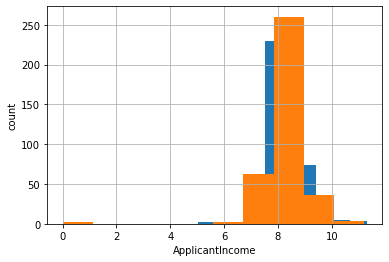

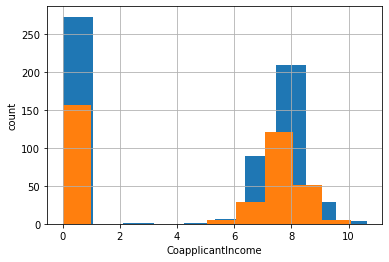

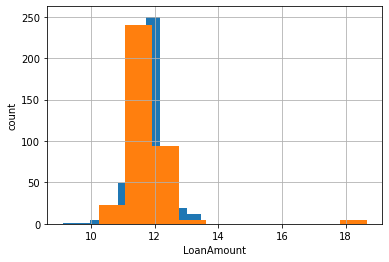

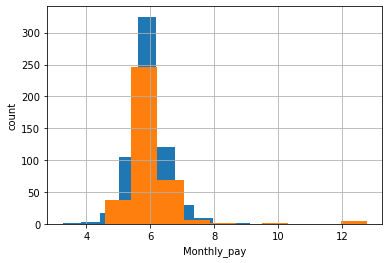

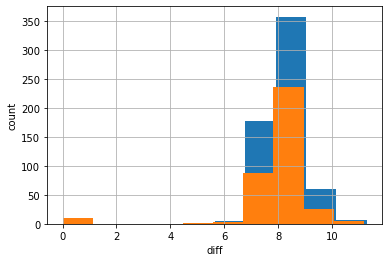

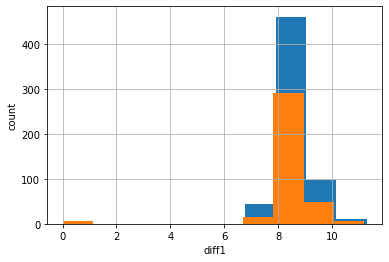

In [97]:
for feature in con_features:
    
    train_df[feature] = np.log1p(train_df[feature])
    test_df[feature] = np.log1p(test_df[feature])
    train_df[feature].hist()
    test_df[feature].hist()
    #sns.boxplot(x=feature,data=train_df)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

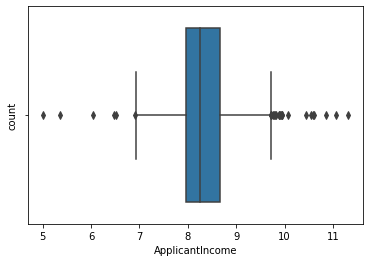

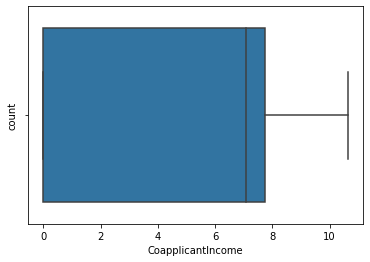

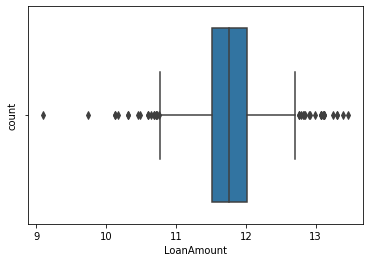

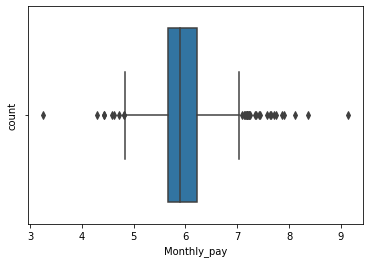

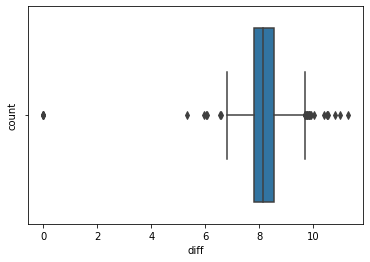

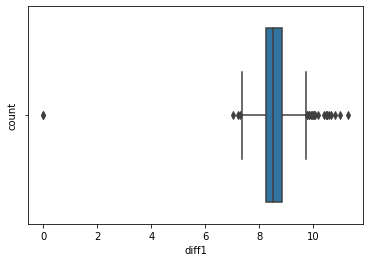

In [98]:
for feature in con_features:
    
    sns.boxplot(x=feature,data=train_df)
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.show()

for feature in con_features:
    IQR = train_df[feature].quantile(0.75) - train_df[feature].quantile(0.25)
    upper_bond = train_df[feature].quantile(0.75) + (IQR * 3)
    lower_bond = train_df[feature].quantile(0.25) - (IQR * 3)
    
    train_df[feature] = np.where(train_df[feature]>upper_bond,upper_bond,train_df[feature])
    train_df[feature] = np.where(train_df[feature]<lower_bond,lower_bond,train_df[feature])
    
    test_df[feature] = np.where(test_df[feature]>upper_bond,upper_bond,test_df[feature])
    test_df[feature] = np.where(test_df[feature]<lower_bond,lower_bond,test_df[feature])

In [99]:
cat_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

In [100]:
cat_features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Gender_Married',
 'Self_employed_Property_area']

In [101]:
['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

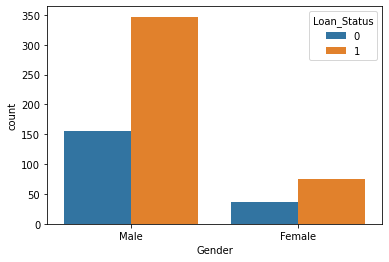

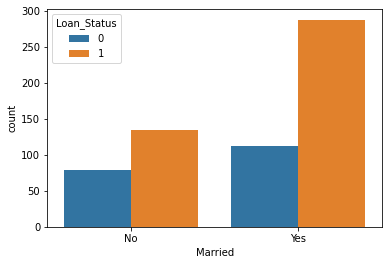

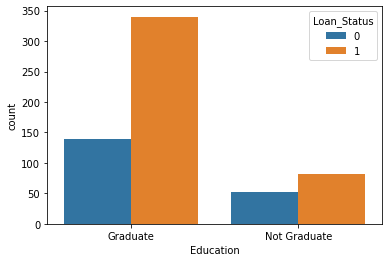

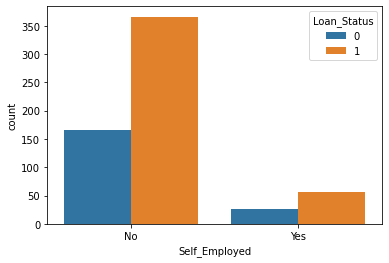

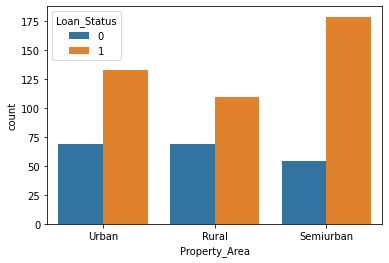

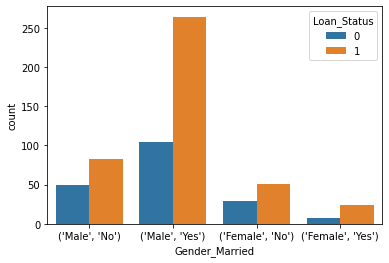

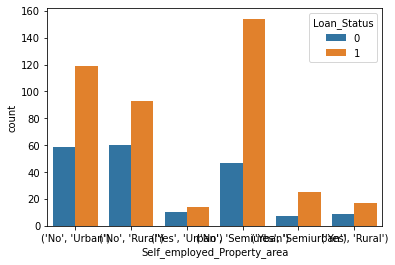

In [102]:
for feature in cat_features:
    sns.countplot(x=feature,data=train_df,hue='Loan_Status')
    plt.show()

In [103]:
#train_df=pd.concat([pd.get_dummies(train_df[cat_features],drop_first=True),train_df.drop(cat_features,axis=1,inplace=True)],axis=1)

In [104]:
#sns.pairplot(train_df,hue='Loan_Status',dropna=True)

In [105]:
for feature in cat_features:
    ordered_labels = train_df.groupby([feature])['Loan_Status'].mean().sort_values().index
    ordinal_label = {k:i for i,k in enumerate(ordered_labels,0)}
    train_df[feature] = train_df[feature].map(ordinal_label)
    test_df[feature] = test_df[feature].map(ordinal_label)

In [106]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,diff,imp,CoapplicantIncome_nan,Credit_History_nan,diff1,imp1,Gender_Married,Self_employed_Property_area
0,1,0,0,1,1,8.674197,0.000000,11.759793,360.0,1.0,1,1,5.874931,8.611594,1,1,0.0,8.611594,1,0,3
1,1,1,1,1,1,8.430327,7.319202,11.759793,360.0,1.0,0,0,5.874931,8.349721,1,0,0.0,8.654692,1,2,1
2,1,1,0,1,0,8.006701,0.000000,11.097425,360.0,1.0,1,1,5.214936,7.943783,1,1,0.0,7.943783,1,2,0
3,1,1,0,0,1,7.857094,7.765993,11.695255,360.0,1.0,1,1,5.811141,7.719130,1,0,0.0,8.435766,1,2,3
4,1,0,0,1,1,8.699681,0.000000,11.856522,360.0,1.0,1,1,5.971262,8.632306,1,1,0.0,8.632306,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,1,7.972811,0.000000,11.170449,360.0,1.0,0,1,5.288267,7.902487,1,1,0.0,7.902487,1,1,1
610,1,1,3,1,1,8.320448,0.000000,10.596660,180.0,1.0,0,1,5.407172,8.264878,1,1,0.0,8.264878,1,2,1
611,1,1,1,1,1,8.996280,5.484797,12.441149,360.0,1.0,1,1,6.555357,8.905309,1,0,0.0,8.937350,1,2,3
612,1,1,2,1,1,8.933796,0.000000,12.138869,360.0,1.0,1,1,6.253829,8.862908,1,1,0.0,8.862908,1,2,3


In [107]:
#sns.pairplot(train_df,hue='Loan_Status',dropna=True)

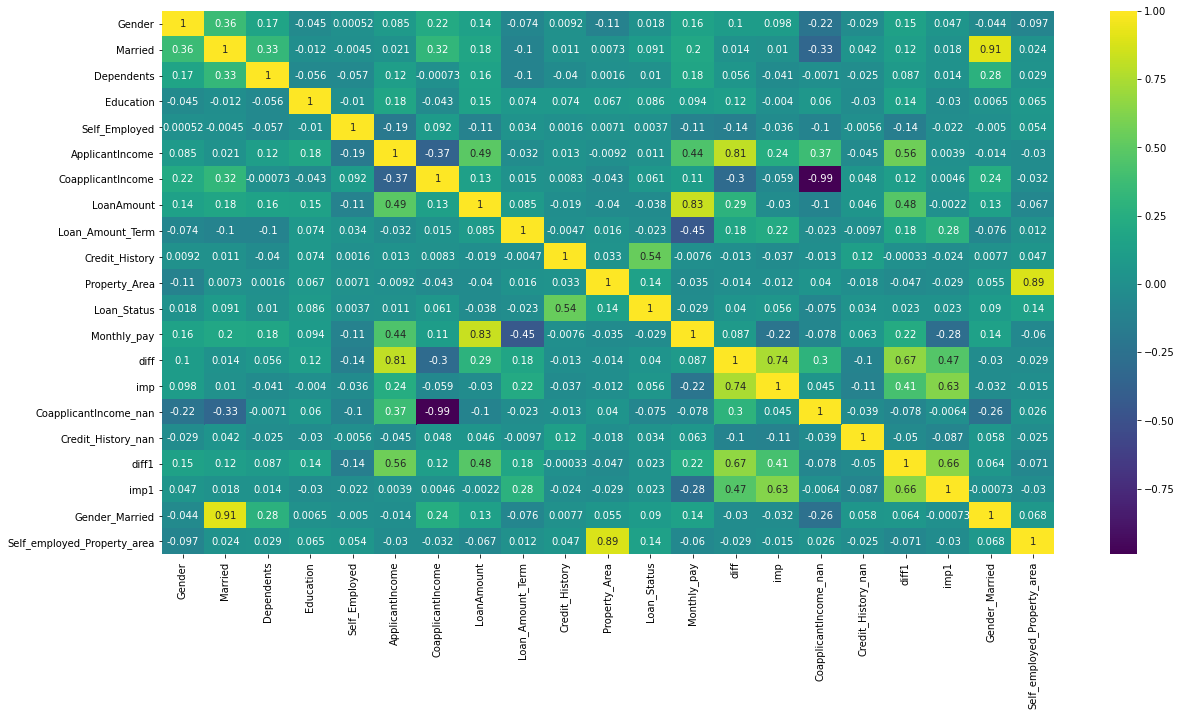

In [109]:
plt.figure(figsize=(20,10))
sns.heatmap(train_df.corr(),annot=True,cmap='viridis')

In [110]:
train_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Monthly_pay,diff,imp,CoapplicantIncome_nan,Credit_History_nan,diff1,imp1,Gender_Married,Self_employed_Property_area
0,1,0,0,1,1,8.674197,0.000000,11.759793,360.0,1.0,1,1,5.874931,8.611594,1,1,0.0,8.611594,1,0,3
1,1,1,1,1,1,8.430327,7.319202,11.759793,360.0,1.0,0,0,5.874931,8.349721,1,0,0.0,8.654692,1,2,1
2,1,1,0,1,0,8.006701,0.000000,11.097425,360.0,1.0,1,1,5.214936,7.943783,1,1,0.0,7.943783,1,2,0
3,1,1,0,0,1,7.857094,7.765993,11.695255,360.0,1.0,1,1,5.811141,7.719130,1,0,0.0,8.435766,1,2,3
4,1,0,0,1,1,8.699681,0.000000,11.856522,360.0,1.0,1,1,5.971262,8.632306,1,1,0.0,8.632306,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,1,7.972811,0.000000,11.170449,360.0,1.0,0,1,5.288267,7.902487,1,1,0.0,7.902487,1,1,1
610,1,1,3,1,1,8.320448,0.000000,10.596660,180.0,1.0,0,1,5.407172,8.264878,1,1,0.0,8.264878,1,2,1
611,1,1,1,1,1,8.996280,5.484797,12.441149,360.0,1.0,1,1,6.555357,8.905309,1,0,0.0,8.937350,1,2,3
612,1,1,2,1,1,8.933796,0.000000,12.138869,360.0,1.0,1,1,6.253829,8.862908,1,1,0.0,8.862908,1,2,3


In [111]:
test_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Monthly_pay,diff,imp,CoapplicantIncome_nan,Credit_History_nan,diff1,imp1,Gender_Married,Self_employed_Property_area
0,1,1,0,1,1,8.651899,0.000000,11.608245,360.0,1.0,1,5.723585,8.597113,1,1,0.0,8.597113,1,2,3
1,1,1,1,1,1,8.031710,7.313887,11.744045,360.0,1.0,1,5.860786,7.910957,1,0,0.0,8.349248,1,2,3
2,1,1,2,1,1,8.517393,7.496097,12.245298,360.0,1.0,1,6.359574,8.394800,1,0,0.0,8.736168,1,2,3
3,1,1,2,1,1,7.758333,7.842671,11.512935,360.0,1.0,1,5.627621,7.632401,1,0,1.0,8.435983,1,2,3
4,1,0,0,0,1,8.094684,0.000000,11.264477,360.0,1.0,1,5.379897,8.026497,1,1,0.0,8.026497,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,0,8.296547,7.483244,11.635152,360.0,1.0,1,5.749393,8.215277,1,0,0.0,8.607765,1,2,0
363,1,1,0,1,1,8.333030,6.565265,11.652696,360.0,1.0,1,5.768321,8.253228,1,0,0.0,8.422663,1,2,3
364,1,0,0,1,1,8.086718,7.597898,11.744045,360.0,1.0,2,5.860786,7.972811,1,0,1.0,8.495765,1,0,4
365,1,1,0,1,1,8.517393,7.780721,11.970357,360.0,1.0,0,6.084499,8.425736,1,0,0.0,8.847360,1,2,1


In [115]:
features = train_df.drop('Loan_Status',axis=1).columns

In [116]:
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier

In [117]:
from sklearn.model_selection import train_test_split
df_train, df_eval = train_test_split(train_df,test_size=0.20, shuffle=True, stratify=train_df['Loan_Status'])

In [132]:
df_train['Loan_Status'].value_counts()

1    337
0    308
Name: Loan_Status, dtype: int64

In [120]:
fix_1 = df_train[df_train['Loan_Status']==0]

In [121]:
for i in range(1):
    df_train = pd.concat([df_train,fix_1],axis=0)

In [123]:
feature_cols = df_train.columns.tolist()
feature_cols.remove('Loan_Status')
label_col = 'Loan_Status'
print(len(feature_cols),feature_cols)

20 ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Monthly_pay', 'diff', 'imp', 'CoapplicantIncome_nan', 'Credit_History_nan', 'diff1', 'imp1', 'Gender_Married', 'Self_employed_Property_area']


In [124]:
cat_features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Gender_Married',
 'Self_employed_Property_area']

In [125]:
cat_cols = ['Gender','Married','Education','Self_Employed','Property_Area','Gender_Married','Self_employed_Property_area','Dependents','Credit_History','imp','CoapplicantIncome_nan','Credit_History_nan','imp1']

In [137]:
params = {}
params['learning_rate'] = 0.01
params['max_depth'] = 18
params['n_estimators'] = 2000
params['objective'] = 'binary'
params['boosting_type'] = 'gbdt'
params['subsample'] = 0.7
params['colsample_bytree']=1
params['min_data_in_leaf'] = 55
params['reg_alpha'] = 0
params['reg_lambda'] = 0

In [138]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score,f1_score

In [141]:
clf = LGBMClassifier(**params)
    
clf.fit(df_train[feature_cols], df_train[label_col], early_stopping_rounds=1000, eval_set=[(df_train[feature_cols], df_train[label_col]), (df_eval[feature_cols], df_eval[label_col])], eval_metric='binary_error', verbose=True, categorical_feature=cat_cols)

eval_score = f1_score(df_eval[label_col], clf.predict(df_eval[feature_cols]),average='macro')

print('Eval ACC: {}'.format(eval_score))

[1]	valid_0's binary_error: 0.477519	valid_0's binary_logloss: 0.688731	valid_1's binary_error: 0.308943	valid_1's binary_logloss: 0.674626
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's binary_error: 0.477519	valid_0's binary_logloss: 0.685394	valid_1's binary_error: 0.308943	valid_1's binary_logloss: 0.672335
[3]	valid_0's binary_error: 0.477519	valid_0's binary_logloss: 0.682124	valid_1's binary_error: 0.308943	valid_1's binary_logloss: 0.670091
[4]	valid_0's binary_error: 0.477519	valid_0's binary_logloss: 0.678918	valid_1's binary_error: 0.308943	valid_1's binary_logloss: 0.667893
[5]	valid_0's binary_error: 0.362791	valid_0's binary_logloss: 0.675775	valid_1's binary_error: 0.219512	valid_1's binary_logloss: 0.66574
[6]	valid_0's binary_error: 0.27907	valid_0's binary_logloss: 0.672694	valid_1's binary_error: 0.195122	valid_1's binary_logloss: 0.663631
[7]	valid_0's binary_error: 0.27907	valid_0's binary_logloss: 0.669672	valid_1's binary_error: 0.19

[166]	valid_0's binary_error: 0.234109	valid_0's binary_logloss: 0.477146	valid_1's binary_error: 0.235772	valid_1's binary_logloss: 0.53714
[167]	valid_0's binary_error: 0.234109	valid_0's binary_logloss: 0.476675	valid_1's binary_error: 0.235772	valid_1's binary_logloss: 0.537043
[168]	valid_0's binary_error: 0.234109	valid_0's binary_logloss: 0.476214	valid_1's binary_error: 0.235772	valid_1's binary_logloss: 0.536786
[169]	valid_0's binary_error: 0.231008	valid_0's binary_logloss: 0.47577	valid_1's binary_error: 0.235772	valid_1's binary_logloss: 0.536712
[170]	valid_0's binary_error: 0.231008	valid_0's binary_logloss: 0.475236	valid_1's binary_error: 0.235772	valid_1's binary_logloss: 0.53664
[171]	valid_0's binary_error: 0.227907	valid_0's binary_logloss: 0.474785	valid_1's binary_error: 0.243902	valid_1's binary_logloss: 0.536399
[172]	valid_0's binary_error: 0.231008	valid_0's binary_logloss: 0.474354	valid_1's binary_error: 0.243902	valid_1's binary_logloss: 0.536343
[173]	val

[328]	valid_0's binary_error: 0.15969	valid_0's binary_logloss: 0.412111	valid_1's binary_error: 0.284553	valid_1's binary_logloss: 0.527206
[329]	valid_0's binary_error: 0.15814	valid_0's binary_logloss: 0.411734	valid_1's binary_error: 0.284553	valid_1's binary_logloss: 0.527148
[330]	valid_0's binary_error: 0.16124	valid_0's binary_logloss: 0.411212	valid_1's binary_error: 0.284553	valid_1's binary_logloss: 0.527057
[331]	valid_0's binary_error: 0.16124	valid_0's binary_logloss: 0.410918	valid_1's binary_error: 0.292683	valid_1's binary_logloss: 0.527027
[332]	valid_0's binary_error: 0.16124	valid_0's binary_logloss: 0.410643	valid_1's binary_error: 0.284553	valid_1's binary_logloss: 0.527151
[333]	valid_0's binary_error: 0.15969	valid_0's binary_logloss: 0.410422	valid_1's binary_error: 0.292683	valid_1's binary_logloss: 0.527282
[334]	valid_0's binary_error: 0.15969	valid_0's binary_logloss: 0.410152	valid_1's binary_error: 0.292683	valid_1's binary_logloss: 0.527407
[335]	valid_0

[494]	valid_0's binary_error: 0.134884	valid_0's binary_logloss: 0.364257	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.528469
[495]	valid_0's binary_error: 0.134884	valid_0's binary_logloss: 0.364077	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.528528
[496]	valid_0's binary_error: 0.134884	valid_0's binary_logloss: 0.363838	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.528654
[497]	valid_0's binary_error: 0.134884	valid_0's binary_logloss: 0.363673	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.528582
[498]	valid_0's binary_error: 0.136434	valid_0's binary_logloss: 0.363441	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.52863
[499]	valid_0's binary_error: 0.134884	valid_0's binary_logloss: 0.363163	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.528547
[500]	valid_0's binary_error: 0.136434	valid_0's binary_logloss: 0.362932	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.52828
[501]	va

[663]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.326074	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.524263
[664]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.325814	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.524317
[665]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.325616	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.524339
[666]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.325477	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.524424
[667]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.325352	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.524359
[668]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.325158	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.524374
[669]	valid_0's binary_error: 0.106977	valid_0's binary_logloss: 0.324902	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.524429
[670]	

[830]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294944	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523122
[831]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294741	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523013
[832]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294549	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.52295
[833]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294401	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523055
[834]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294261	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523097
[835]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.294161	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523133
[836]	valid_0's binary_error: 0.0899225	valid_0's binary_logloss: 0.293961	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.523027


[996]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.269482	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.517779
[997]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.269328	valid_1's binary_error: 0.284553	valid_1's binary_logloss: 0.517836
[998]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.269192	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.517773
[999]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.269078	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.517862
[1000]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.268926	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.517874
[1001]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.268784	valid_1's binary_error: 0.268293	valid_1's binary_logloss: 0.517961
[1002]	valid_0's binary_error: 0.075969	valid_0's binary_logloss: 0.268614	valid_1's binary_error: 0.276423	valid_1's binary_logloss: 0.518052
[10

In [142]:
best_iter = clf.best_iteration_
params['n_estimators'] = best_iter
print(params)

{'learning_rate': 0.01, 'max_depth': 18, 'n_estimators': 6, 'objective': 'binary', 'boosting_type': 'gbdt', 'subsample': 0.7, 'colsample_bytree': 1, 'min_data_in_leaf': 55, 'reg_alpha': 0, 'reg_lambda': 0}


In [149]:
fea = ['Gender']
score = 0
for i in features[3:]:
    #if i != 'Credit_History' :
        fea.append(i)
        temp = cross_val_score(clf,df_train[fea],df_train['Loan_Status'],scoring='accuracy').mean()
        if temp > score:
            score = temp
        else:
            fea.pop()

In [148]:
fea

['Gender',
 'Education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Monthly_pay',
 'Gender_Married',
 'Self_employed_Property_area']

In [150]:
fea

['Gender',
 'Education',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Monthly_pay',
 'diff',
 'diff1']

In [151]:
sub = pd.read_csv('sample_submission.csv')

In [152]:
sub

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,N
363,LP002975,N
364,LP002980,N
365,LP002986,N


In [156]:
sub['Loan_Status'] = clf.predict(test_df)

In [157]:
sub['Loan_Status'] = np.where(sub['Loan_Status']==1,'Y','N')

In [158]:
sub.to_csv('output.csv',index=False)

In [160]:
sub_df = pd.read_csv('output.csv')

In [162]:
sub_df['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64